In [1]:
import pathlib
from pathlib import Path
import pandas as pd
import xarray as xr
import numpy as np
from peak_resolver.process_chromeleon import process_chromeleon_file

In [2]:
def get_fanny_concentration(file: pathlib.PosixPath):
    n = file.name
    conc = {'1':0.05, '2':0.1, '3': 0.2, '4':0.3, '5': 0.4, '6':0.5}
    return conc[n[1]]

def read_fanny_calib(p: pathlib.PosixPath, tmin=0, tmax=30, tgrid=None):
    files = p.glob('*.txt')
    acid = p.name.split(' ')[0].lower().capitalize()
    print(acid)
    data_list = []
    for file in files:
        data = process_chromeleon_file(file, tmin, tmax, tgrid = tgrid)
        data[acid] = get_fanny_concentration(file)
        data = data.set_index(['t', acid]).to_xarray()
        data_list.append(data)
    data = xr.combine_by_coords(data_list)
    savepath = str(p / acid) + '.nc'
    data.to_netcdf(savepath)
    return files, data

In [3]:
path = Path('/Users/ianbillinge/Documents/yiplab/projects/org_acids_iems/Fanny Raw IC Data/Calibration Curves/')
path = path.resolve()
print(path)
acids = [i for i in path.iterdir() if i.is_dir()]
for acid in acids:
    print(acid)
    files, data = read_fanny_calib(acid, tmin=6.5, tmax=9)

/Users/ianbillinge/Documents/yiplab/projects/org_acids_iems/Fanny Raw IC Data/Calibration Curves
/Users/ianbillinge/Documents/yiplab/projects/org_acids_iems/Fanny Raw IC Data/Calibration Curves/ACETIC ACID
Acetic
/Users/ianbillinge/Documents/yiplab/projects/org_acids_iems/Fanny Raw IC Data/Calibration Curves/BUTYRIC ACID
Butyric
/Users/ianbillinge/Documents/yiplab/projects/org_acids_iems/Fanny Raw IC Data/Calibration Curves/PROPANOIC ACID
Propanoic
/Users/ianbillinge/Documents/yiplab/projects/org_acids_iems/Fanny Raw IC Data/Calibration Curves/VALERIC ACID
Valeric
/Users/ianbillinge/Documents/yiplab/projects/org_acids_iems/Fanny Raw IC Data/Calibration Curves/CAPROIC ACID
Caproic


In [7]:
tmin = 6.5
tmax = 9
a_path, ace = read_fanny_calib(acids[0],  tmin=tmin, tmax=tmax)
p_path, pro = read_fanny_calib(acids[1],  tmin=tmin, tmax=tmax)
b_path, but = read_fanny_calib(acids[2], tmin=tmin, tmax=tmax)
v_path, val = read_fanny_calib(acids[3], tmin=tmin, tmax=tmax)

Acetic
Butyric
Propanoic
Valeric


In [8]:
ace

<xarray.Dataset>
Dimensions:  (t: 8996, Acetic: 6)
Coordinates:
  * t        (t) float64 6.501 6.501 6.501 6.501 6.502 ... 8.999 8.999 8.999 9.0
  * Acetic   (Acetic) float64 0.05 0.1 0.2 0.3 0.4 0.5
Data variables:
    s        (t, Acetic) float64 -0.05819 -0.05379 -0.05508 ... 0.01028 0.01809
    ds       (t, Acetic) float64 1.5e-05 2.501e-05 ... -1.167e-05 -1.417e-05
    d2s      (t, Acetic) float64 -3.607e-09 6.939e-18 ... 7.459e-17 8.674e-17

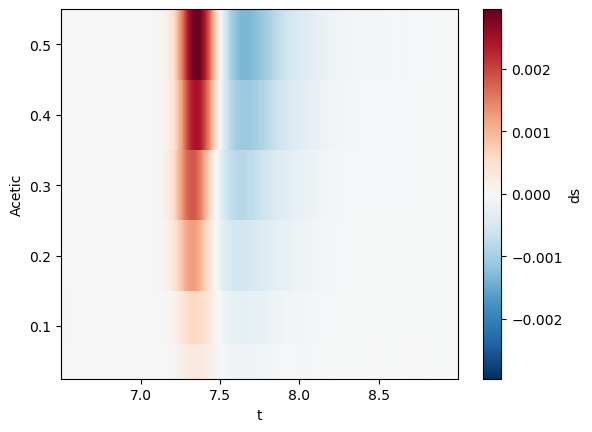

In [9]:
ace['ds'].dropna(dim='Acetic').plot(x='t')

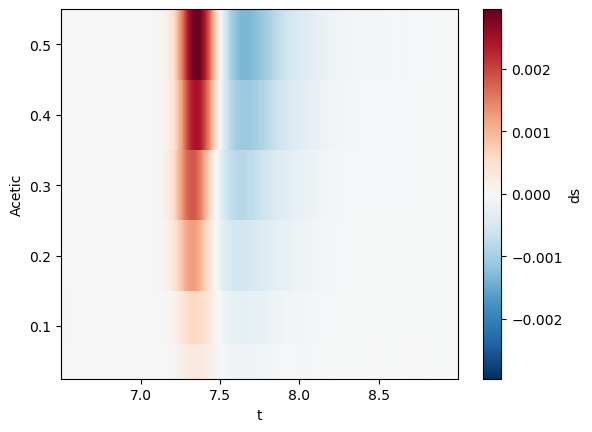

In [10]:
ace['ds'].plot(x='t')